In [1]:
import os
from PIL import Image
import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt



dataDir = 'Medical-MNIST-Classification/resized'  # The main data directory
classNames = os.listdir(dataDir)  # Each type of image can be found in its own subdirectory
numClass = len(classNames)        # Number of types = number of subdirectories
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]                     # A nested list of filenames
numEach = [len(imageFiles[i]) for i in range(numClass)]     # A count of each type of image
imageFilesList = []               # Created an un-nested list of filenames
imageClass = []                   # The labels -- the type of each individual image in the list
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)        # Total number of images
imageWidth, imageHeight = Image.open(imageFilesList[0]).size         # The dimensions of each image

print("There are",numTotal,"images in",numClass,"distinct categories")
print("Label names:",classNames)
print("Label counts:",numEach)
print("Image dimensions:",imageWidth,"x",imageHeight)

print(imageFilesList[1])

There are 58954 images in 6 distinct categories
Label names: ['Hand', 'ChestCT', 'CXR', 'AbdomenCT', 'BreastMRI', 'HeadCT']
Label counts: [10000, 10000, 10000, 10000, 8954, 10000]
Image dimensions: 64 x 64
Medical-MNIST-Classification/resized/Hand/009351.jpeg


## Using direct DataLoader

In [2]:
image_size = 28

toTensor = torchvision.transforms.ToTensor()
toResize = torchvision.transforms.Resize(image_size)
toCenterCrop = torchvision.transforms.CenterCrop(image_size)
# toGraysacle = torchvision.transforms.Grayscale()

def scaleImage(x):          # Pass a PIL image, return a tensor
    y = toTensor(x)
    y = toResize(y)
    y = toCenterCrop(y)
    if(y.min() < y.max()):  # Assuming the image isn't empty, rescale so its values run from 0 to 1
        y = (y - y.min())/(y.max() - y.min()) 
    z = y - y.mean()        # Subtract the mean value of the image
    return z

In [3]:
imageTensor = torch.stack([scaleImage(Image.open(x)) for x in imageFilesList])  # Load, scale, and stack image (X) tensor
classTensor = torch.tensor(imageClass)  # Create label (Y) tensor
print(type(imageTensor), type(classTensor))
print(imageTensor.shape)
print(classTensor.shape)
print("Rescaled min pixel value = {:1.3}; Max = {:1.3}; Mean = {:1.3}"
      .format(imageTensor.min().item(),imageTensor.max().item(),imageTensor.mean().item()))


<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([58954, 1, 28, 28])
torch.Size([58954])
Rescaled min pixel value = -0.79; Max = 0.979; Mean = -5.41e-11


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


BATCHES_SIZE 7369.25 or len(dataloader) 7370
batch_idx: 0; sampled images in the batch: 0 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


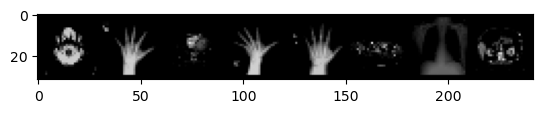

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 100; sampled images in the batch: 800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


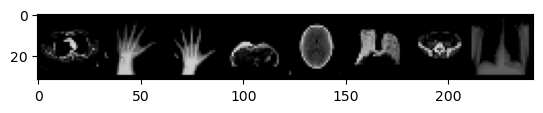

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 200; sampled images in the batch: 1600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


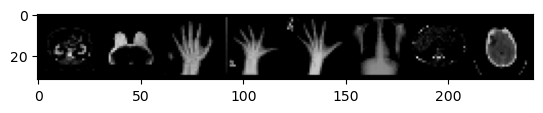

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 300; sampled images in the batch: 2400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


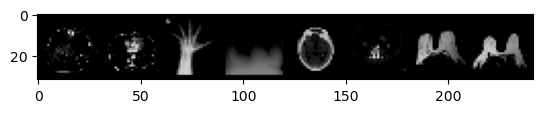

batch_idx: 400; sampled images in the batch: 3200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


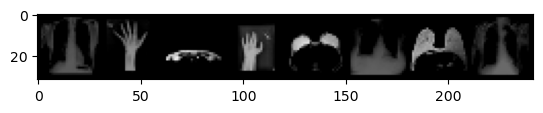

batch_idx: 500; sampled images in the batch: 4000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


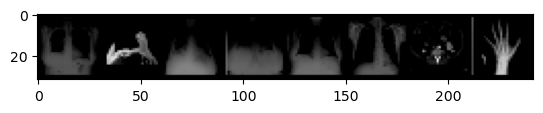

batch_idx: 600; sampled images in the batch: 4800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


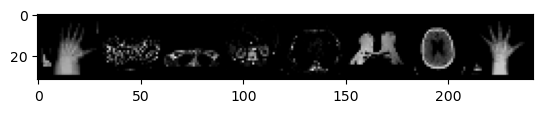

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 700; sampled images in the batch: 5600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


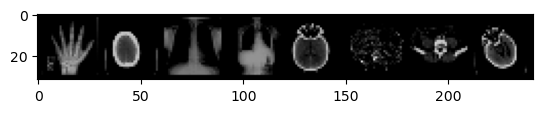

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 800; sampled images in the batch: 6400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


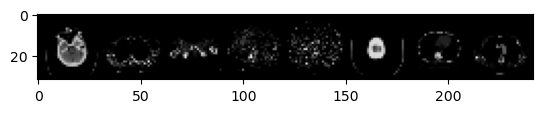

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 900; sampled images in the batch: 7200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


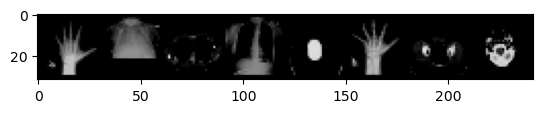

batch_idx: 1000; sampled images in the batch: 8000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


    grid_img.shape: torch.Size([3, 32, 242])


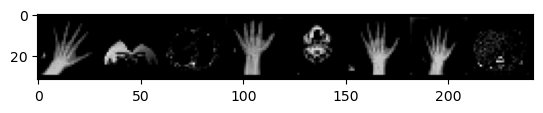

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 1100; sampled images in the batch: 8800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


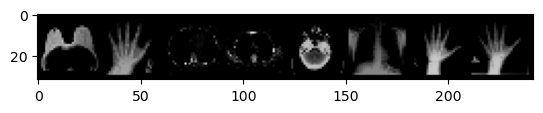

batch_idx: 1200; sampled images in the batch: 9600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


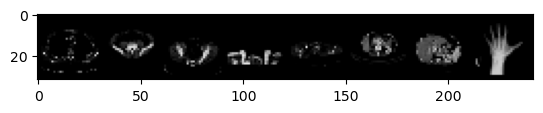

batch_idx: 1300; sampled images in the batch: 10400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


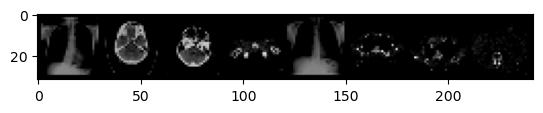

batch_idx: 1400; sampled images in the batch: 11200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


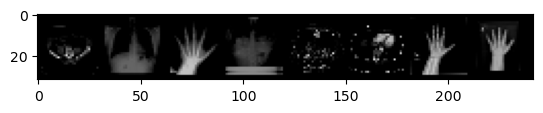

batch_idx: 1500; sampled images in the batch: 12000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


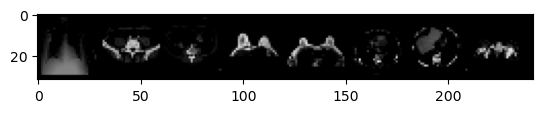

batch_idx: 1600; sampled images in the batch: 12800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


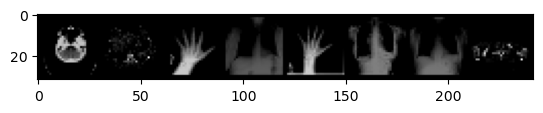

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 1700; sampled images in the batch: 13600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


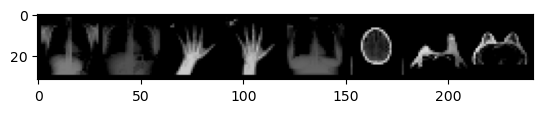

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 1800; sampled images in the batch: 14400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


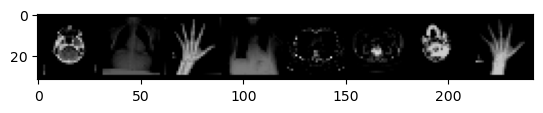

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 1900; sampled images in the batch: 15200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


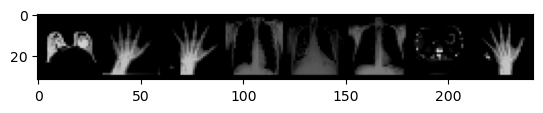

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 2000; sampled images in the batch: 16000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


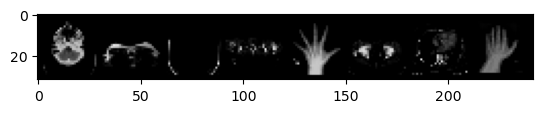

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 2100; sampled images in the batch: 16800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


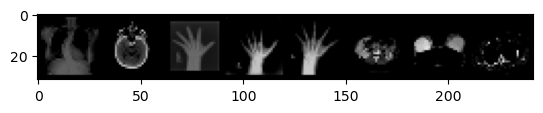

batch_idx: 2200; sampled images in the batch: 17600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


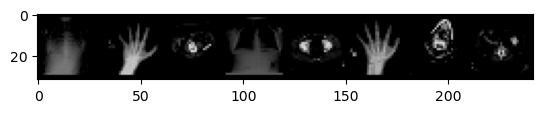

batch_idx: 2300; sampled images in the batch: 18400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


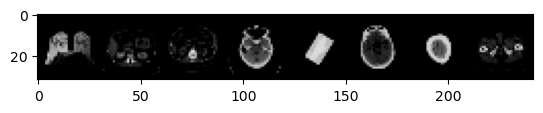

batch_idx: 2400; sampled images in the batch: 19200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


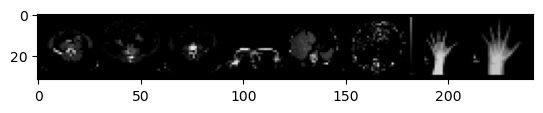

batch_idx: 2500; sampled images in the batch: 20000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


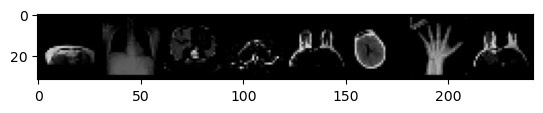

batch_idx: 2600; sampled images in the batch: 20800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


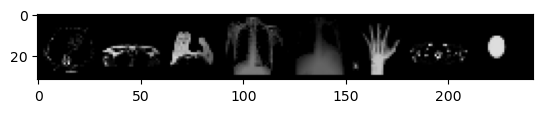

batch_idx: 2700; sampled images in the batch: 21600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


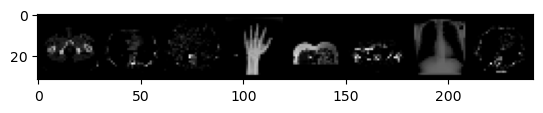

batch_idx: 2800; sampled images in the batch: 22400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


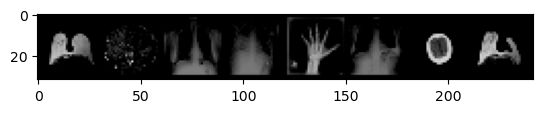

batch_idx: 2900; sampled images in the batch: 23200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


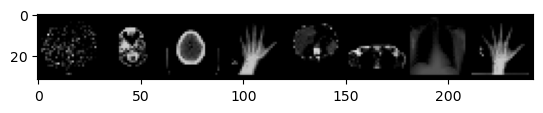

batch_idx: 3000; sampled images in the batch: 24000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


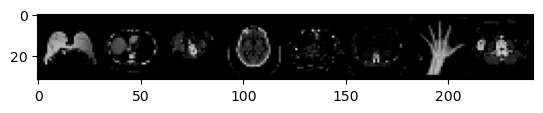

batch_idx: 3100; sampled images in the batch: 24800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


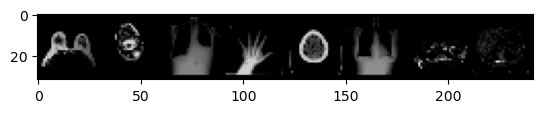

batch_idx: 3200; sampled images in the batch: 25600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


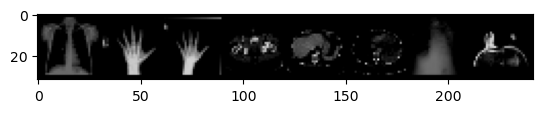

batch_idx: 3300; sampled images in the batch: 26400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


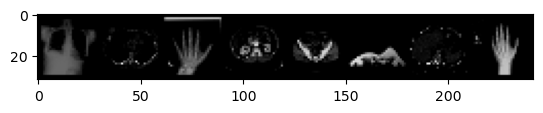

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 3400; sampled images in the batch: 27200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


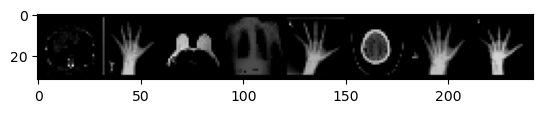

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 3500; sampled images in the batch: 28000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


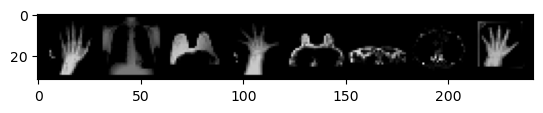

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 3600; sampled images in the batch: 28800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


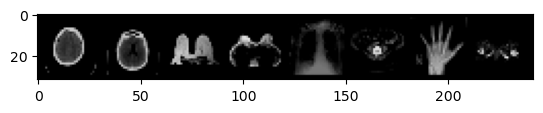

batch_idx: 3700; sampled images in the batch: 29600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


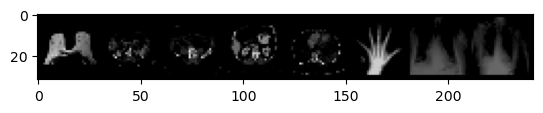

batch_idx: 3800; sampled images in the batch: 30400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


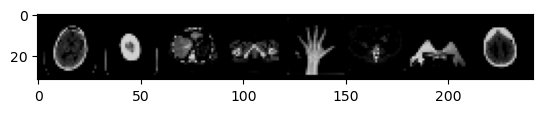

batch_idx: 3900; sampled images in the batch: 31200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


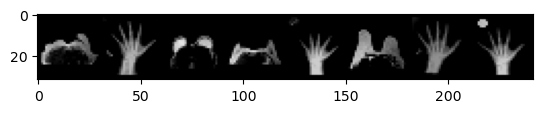

batch_idx: 4000; sampled images in the batch: 32000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


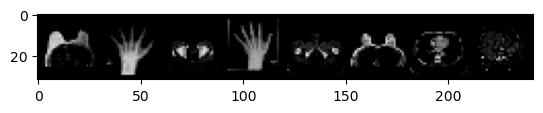

batch_idx: 4100; sampled images in the batch: 32800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


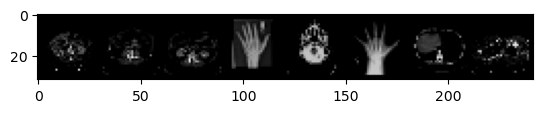

batch_idx: 4200; sampled images in the batch: 33600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


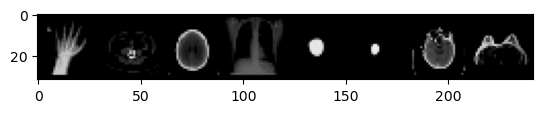

batch_idx: 4300; sampled images in the batch: 34400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


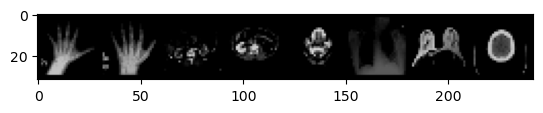

batch_idx: 4400; sampled images in the batch: 35200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


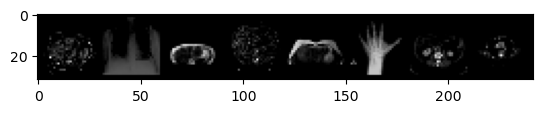

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 4500; sampled images in the batch: 36000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


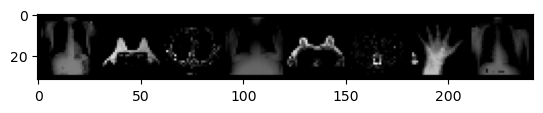

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 4600; sampled images in the batch: 36800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


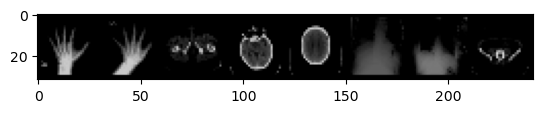

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 4700; sampled images in the batch: 37600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


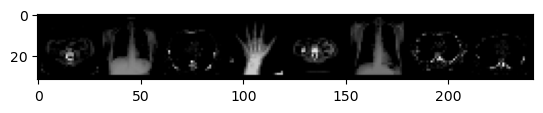

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 4800; sampled images in the batch: 38400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


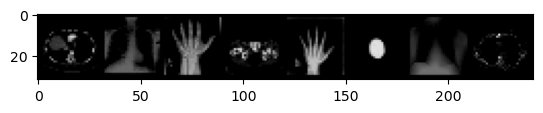

batch_idx: 4900; sampled images in the batch: 39200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


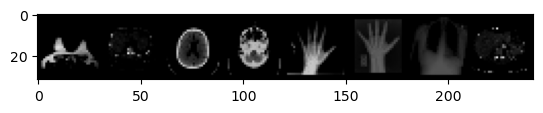

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5000; sampled images in the batch: 40000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


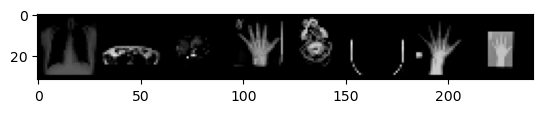

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5100; sampled images in the batch: 40800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


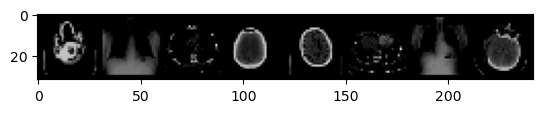

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5200; sampled images in the batch: 41600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


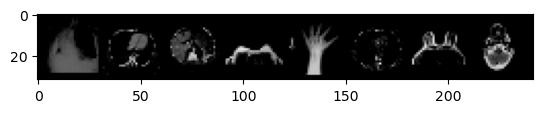

batch_idx: 5300; sampled images in the batch: 42400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


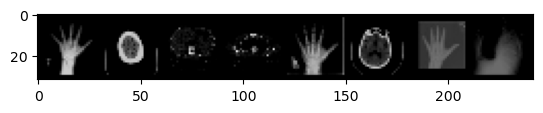

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5400; sampled images in the batch: 43200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


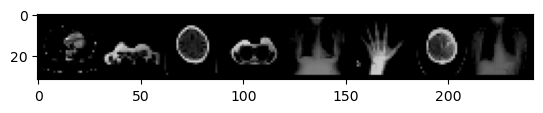

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5500; sampled images in the batch: 44000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


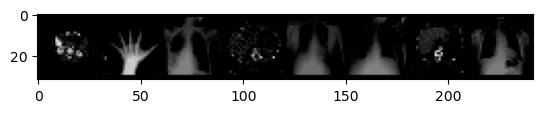

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5600; sampled images in the batch: 44800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


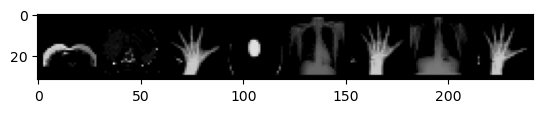

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5700; sampled images in the batch: 45600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


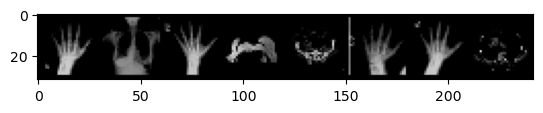

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 5800; sampled images in the batch: 46400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


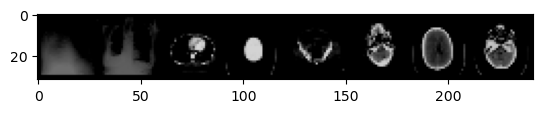

batch_idx: 5900; sampled images in the batch: 47200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


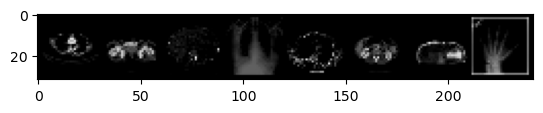

batch_idx: 6000; sampled images in the batch: 48000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


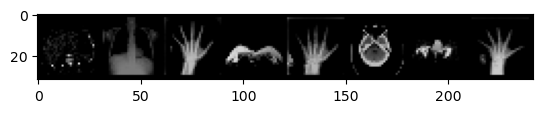

batch_idx: 6100; sampled images in the batch: 48800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


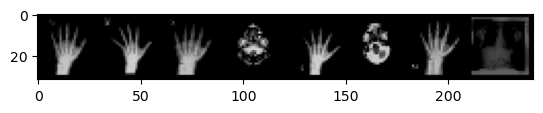

batch_idx: 6200; sampled images in the batch: 49600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


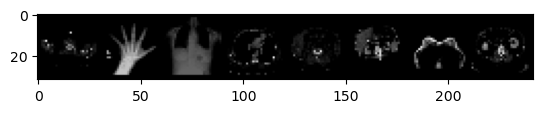

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 6300; sampled images in the batch: 50400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


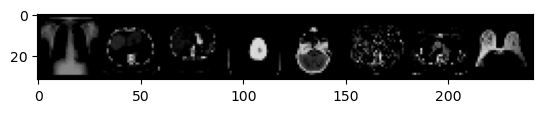

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 6400; sampled images in the batch: 51200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


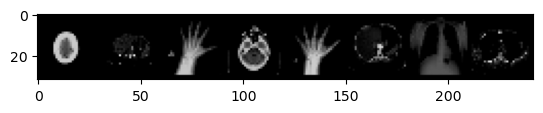

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 6500; sampled images in the batch: 52000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


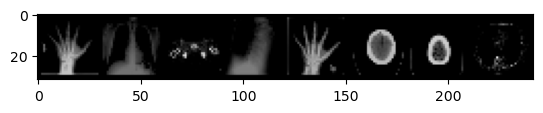

batch_idx: 6600; sampled images in the batch: 52800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


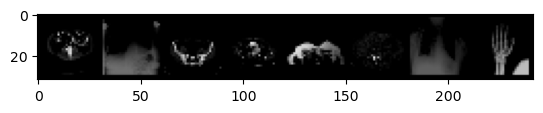

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 6700; sampled images in the batch: 53600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


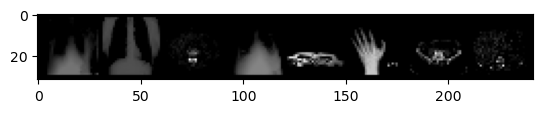

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 6800; sampled images in the batch: 54400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


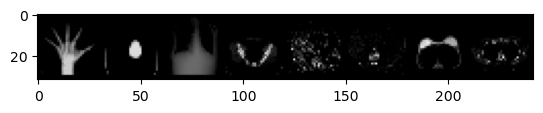

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 6900; sampled images in the batch: 55200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


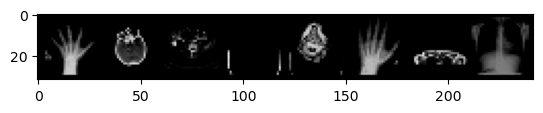

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 7000; sampled images in the batch: 56000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


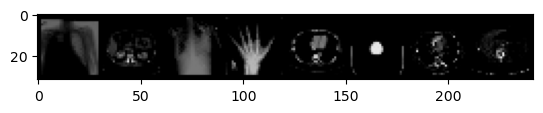

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 7100; sampled images in the batch: 56800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


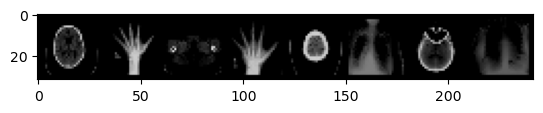

batch_idx: 7200; sampled images in the batch: 57600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


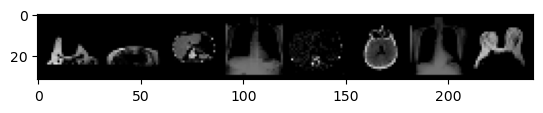

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 7300; sampled images in the batch: 58400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


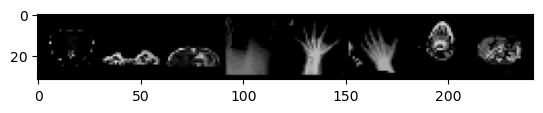

In [8]:
BATCH_SIZE=8
BATCHES_SIZE=58954/BATCH_SIZE
dataloader = DataLoader(imageTensor, batch_size=BATCH_SIZE, shuffle=True)
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')

## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 100 == 0:
        print(f'batch_idx: {batch_idx}; sampled images in the batch: { batch_idx*BATCH_SIZE } of {numTotal}')
        #print(batch.shape)
        img = batch
        print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        grid_img = torchvision.utils.make_grid(img) #also (img, nrow=10)
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        plt.imshow(grid_img.permute(1, 2, 0)) 
        plt.show()
    
    
    

## Using ImageFolder() and DataLoader()

BATCHES_SIZE 7369.25 or len(dataloader) 7370
<class 'torchvision.datasets.folder.ImageFolder'>
58954
7370
batch_idx: 0; sampled images in the batch: 0 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


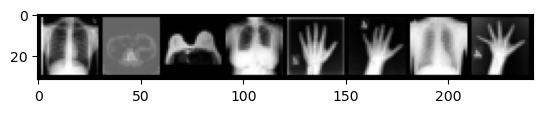

batch_idx: 100; sampled images in the batch: 800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


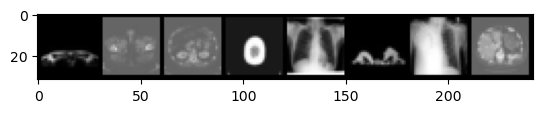

batch_idx: 200; sampled images in the batch: 1600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


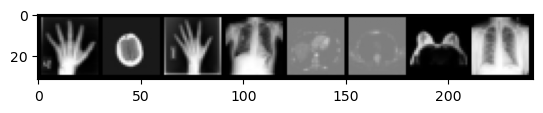

batch_idx: 300; sampled images in the batch: 2400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


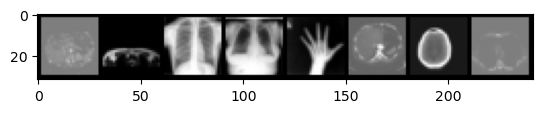

batch_idx: 400; sampled images in the batch: 3200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


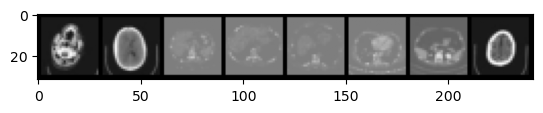

batch_idx: 500; sampled images in the batch: 4000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


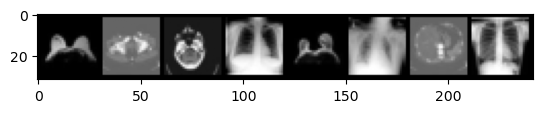

batch_idx: 600; sampled images in the batch: 4800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


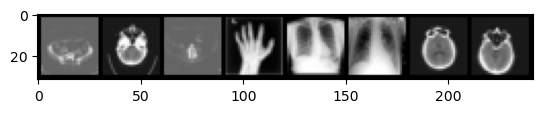

batch_idx: 700; sampled images in the batch: 5600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


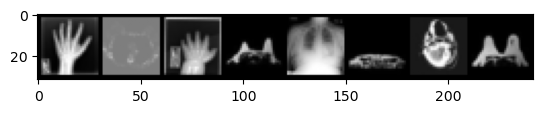

batch_idx: 800; sampled images in the batch: 6400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


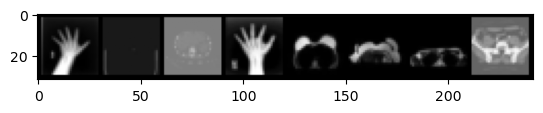

batch_idx: 900; sampled images in the batch: 7200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


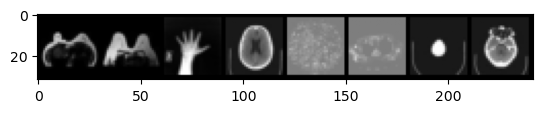

batch_idx: 1000; sampled images in the batch: 8000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


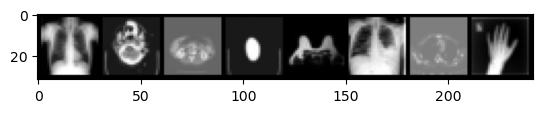

batch_idx: 1100; sampled images in the batch: 8800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


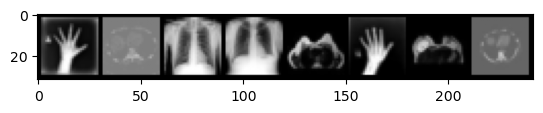

batch_idx: 1200; sampled images in the batch: 9600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


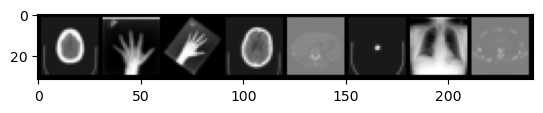

batch_idx: 1300; sampled images in the batch: 10400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


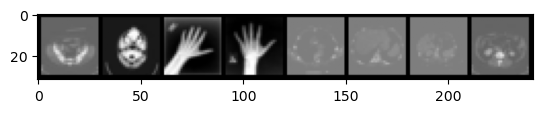

batch_idx: 1400; sampled images in the batch: 11200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


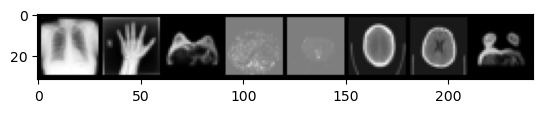

batch_idx: 1500; sampled images in the batch: 12000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


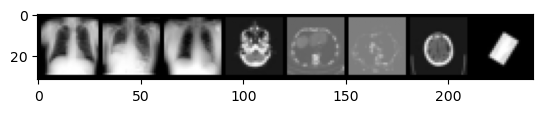

batch_idx: 1600; sampled images in the batch: 12800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


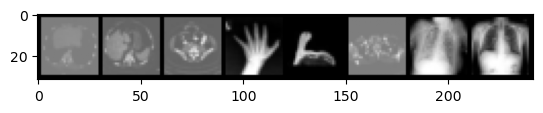

batch_idx: 1700; sampled images in the batch: 13600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


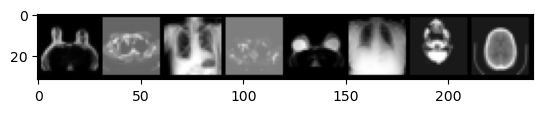

batch_idx: 1800; sampled images in the batch: 14400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


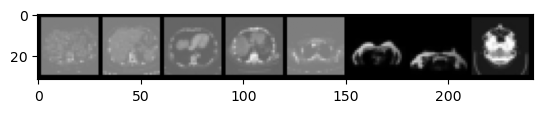

batch_idx: 1900; sampled images in the batch: 15200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


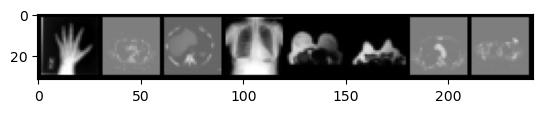

batch_idx: 2000; sampled images in the batch: 16000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


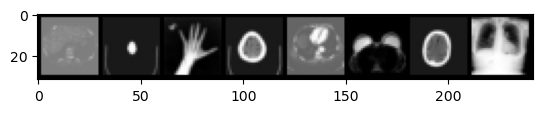

batch_idx: 2100; sampled images in the batch: 16800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


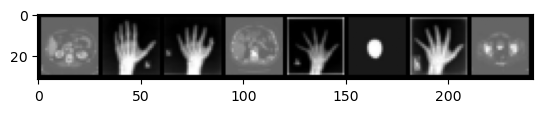

batch_idx: 2200; sampled images in the batch: 17600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


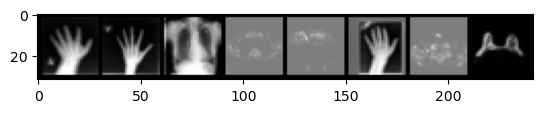

batch_idx: 2300; sampled images in the batch: 18400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


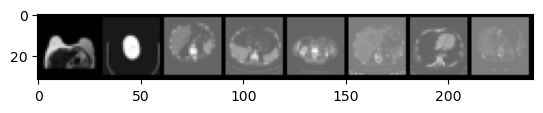

batch_idx: 2400; sampled images in the batch: 19200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


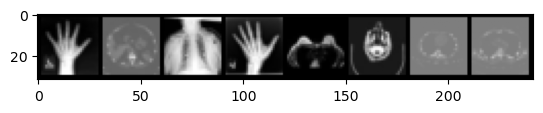

batch_idx: 2500; sampled images in the batch: 20000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


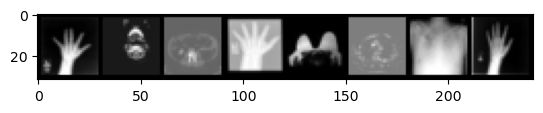

batch_idx: 2600; sampled images in the batch: 20800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


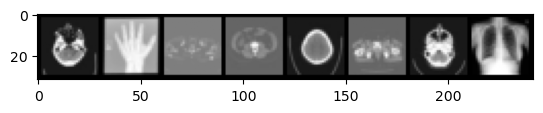

batch_idx: 2700; sampled images in the batch: 21600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


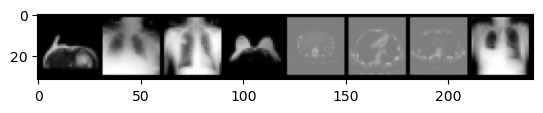

batch_idx: 2800; sampled images in the batch: 22400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


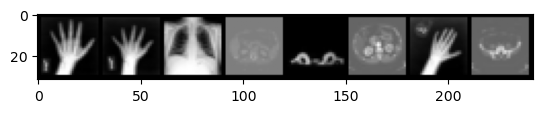

batch_idx: 2900; sampled images in the batch: 23200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


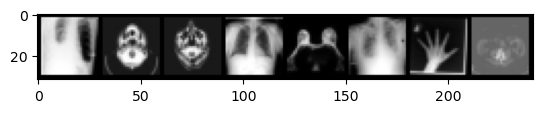

batch_idx: 3000; sampled images in the batch: 24000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


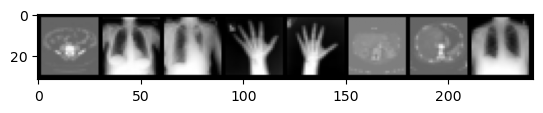

batch_idx: 3100; sampled images in the batch: 24800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


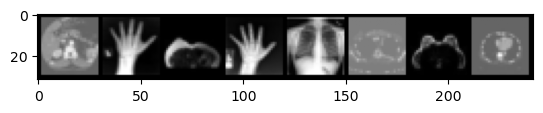

batch_idx: 3200; sampled images in the batch: 25600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


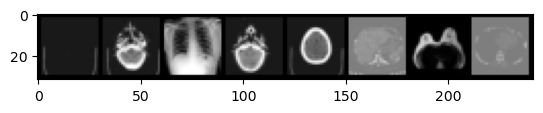

batch_idx: 3300; sampled images in the batch: 26400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


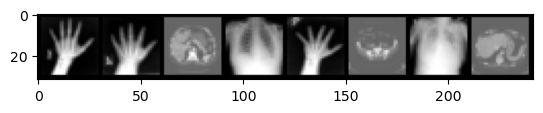

batch_idx: 3400; sampled images in the batch: 27200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


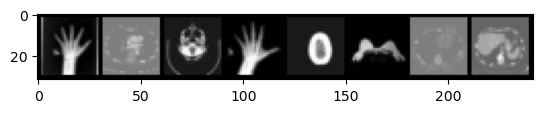

batch_idx: 3500; sampled images in the batch: 28000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


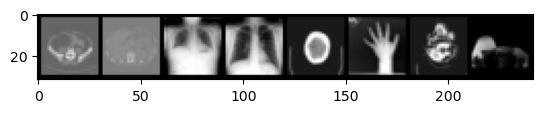

batch_idx: 3600; sampled images in the batch: 28800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


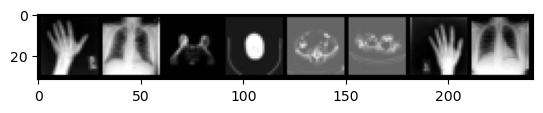

batch_idx: 3700; sampled images in the batch: 29600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


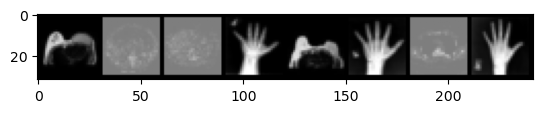

batch_idx: 3800; sampled images in the batch: 30400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


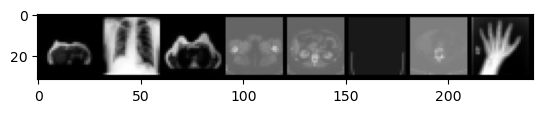

batch_idx: 3900; sampled images in the batch: 31200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


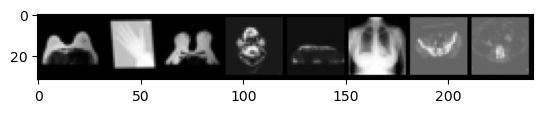

batch_idx: 4000; sampled images in the batch: 32000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


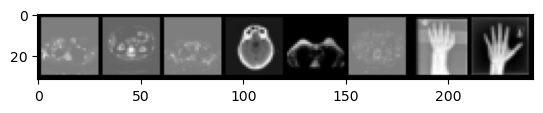

batch_idx: 4100; sampled images in the batch: 32800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


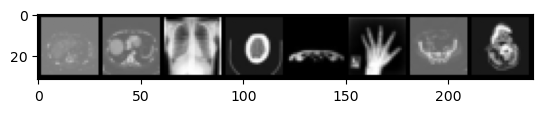

batch_idx: 4200; sampled images in the batch: 33600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


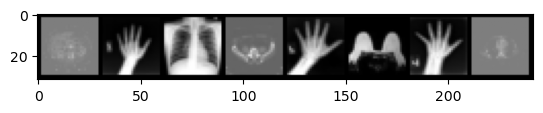

batch_idx: 4300; sampled images in the batch: 34400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


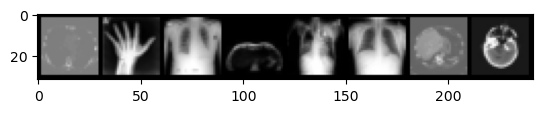

batch_idx: 4400; sampled images in the batch: 35200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


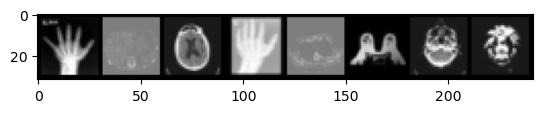

batch_idx: 4500; sampled images in the batch: 36000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


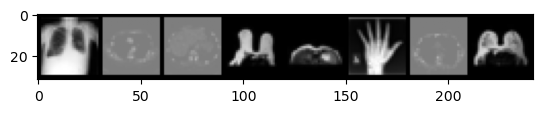

batch_idx: 4600; sampled images in the batch: 36800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


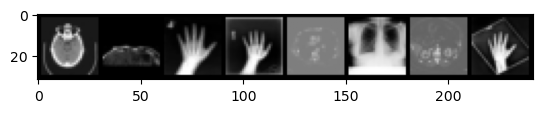

batch_idx: 4700; sampled images in the batch: 37600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


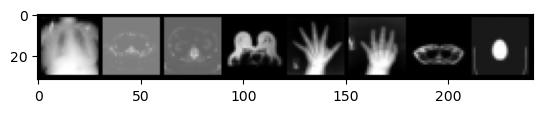

batch_idx: 4800; sampled images in the batch: 38400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


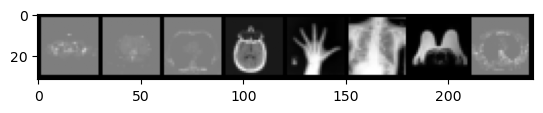

batch_idx: 4900; sampled images in the batch: 39200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


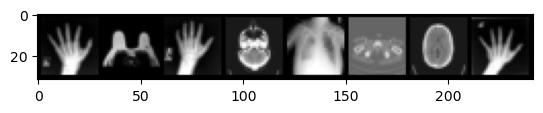

batch_idx: 5000; sampled images in the batch: 40000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


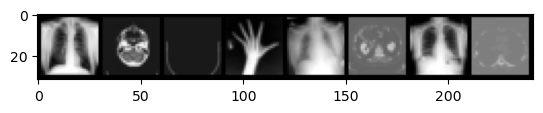

batch_idx: 5100; sampled images in the batch: 40800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


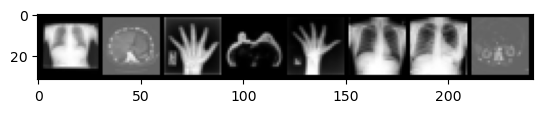

batch_idx: 5200; sampled images in the batch: 41600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


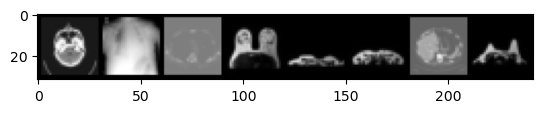

batch_idx: 5300; sampled images in the batch: 42400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


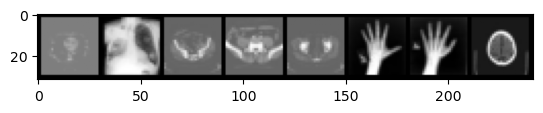

batch_idx: 5400; sampled images in the batch: 43200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


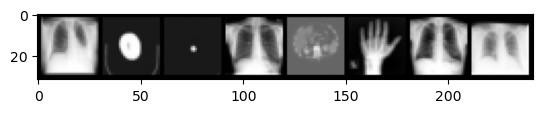

batch_idx: 5500; sampled images in the batch: 44000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


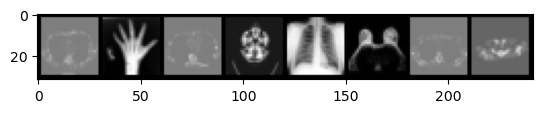

batch_idx: 5600; sampled images in the batch: 44800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


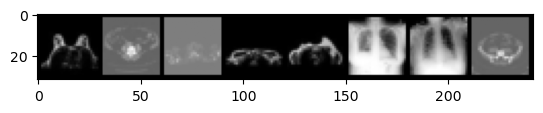

batch_idx: 5700; sampled images in the batch: 45600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


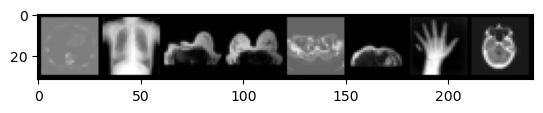

batch_idx: 5800; sampled images in the batch: 46400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


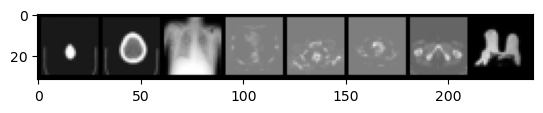

batch_idx: 5900; sampled images in the batch: 47200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


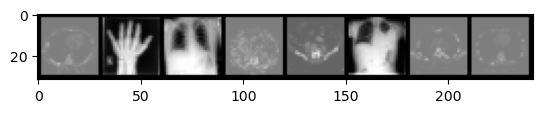

batch_idx: 6000; sampled images in the batch: 48000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


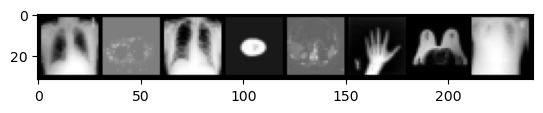

batch_idx: 6100; sampled images in the batch: 48800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


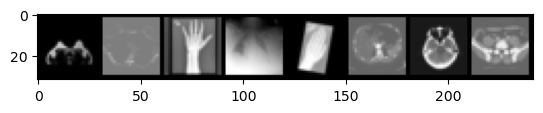

batch_idx: 6200; sampled images in the batch: 49600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


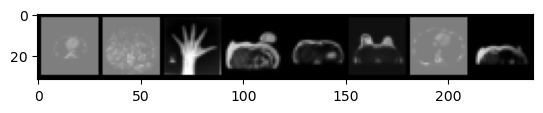

batch_idx: 6300; sampled images in the batch: 50400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


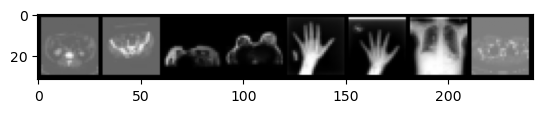

batch_idx: 6400; sampled images in the batch: 51200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


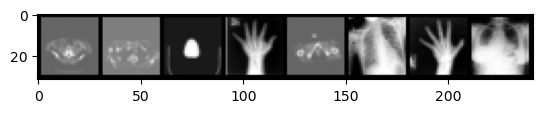

batch_idx: 6500; sampled images in the batch: 52000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


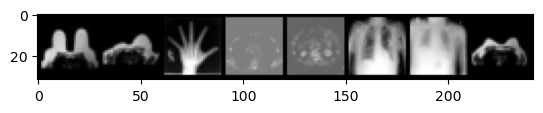

batch_idx: 6600; sampled images in the batch: 52800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


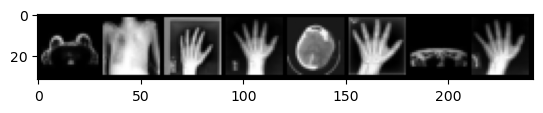

batch_idx: 6700; sampled images in the batch: 53600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


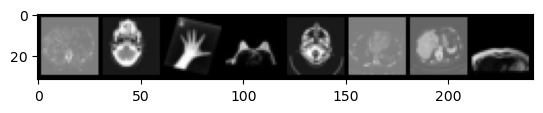

batch_idx: 6800; sampled images in the batch: 54400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


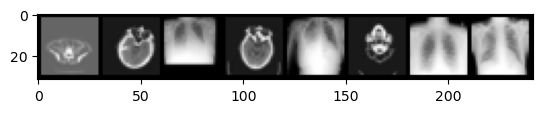

batch_idx: 6900; sampled images in the batch: 55200 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


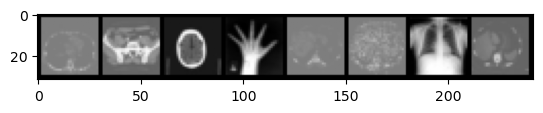

batch_idx: 7000; sampled images in the batch: 56000 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


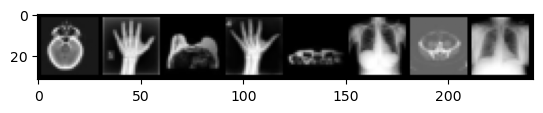

batch_idx: 7100; sampled images in the batch: 56800 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


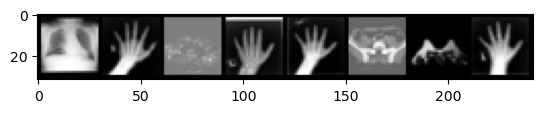

batch_idx: 7200; sampled images in the batch: 57600 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


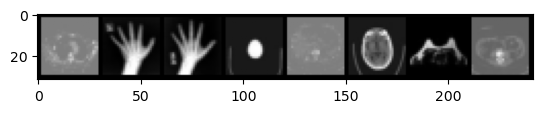

batch_idx: 7300; sampled images in the batch: 58400 of 58954
    img.shape: torch.Size([8, 1, 28, 28])
    grid_img.shape: torch.Size([3, 32, 242])


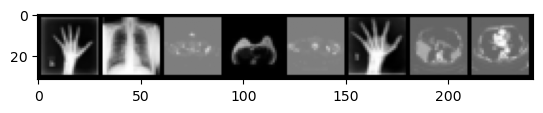

In [7]:

BATCH_SIZE=8
BATCHES_SIZE=58954/BATCH_SIZE
dataloader = DataLoader(imageTensor, batch_size=BATCH_SIZE, shuffle=True)
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')

image_size = 28

transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.CenterCrop(image_size),
            transforms.Grayscale(),
            #transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), # turn into Numpy array of shape HWC, divide by 255
            #transforms.Lambda(lambda t: (t * 2) - 1)
])

data_from_data_dir = torchvision.datasets.ImageFolder(root=dataDir, transform=transform)
print(type(data_from_data_dir))#<class 'torchvision.datasets.folder.ImageFolder'>
print(len(data_from_data_dir))#58954

# data_loader = torch.utils.data.DataLoader(dataset=data, batch_size=batch_size, shuffle=True, num_workers=4)
dataloader = DataLoader(data_from_data_dir, batch_size=BATCH_SIZE, shuffle=True)
print(len(dataloader)) #7370 

## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch  
    if batch_idx % 100 == 0:
        print(f'batch_idx: {batch_idx}; sampled images in the batch: { batch_idx*BATCH_SIZE } of {numTotal}')
        img=batch[0]
        label=batch[1]
        #print(img.shape) #([BATCH_SIZE, CHANNEL_SIZE, 28, 28]
        #print(label)        
        print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        grid_img = torchvision.utils.make_grid(img) #also (img, nrow=10)
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        plt.imshow(grid_img.permute(1, 2, 0)) 
        plt.show()


In [20]:
mycwd = os.getcwd()
print(mycwd)
os.chdir("..") #Cheange to previous directory
results_path = os.getcwd()+'/results'
os.chdir(results_path)

/home/mxochicale/repositories/mxochicale/diffusion-models-tutorials/tutorials/mnist-like-datasets


In [22]:
ls -la

total 19544
drwxrwxr-x 2 mxochicale mxochicale     4096 Dec 20 09:10 ./
drwxrwxr-x 5 mxochicale mxochicale     4096 Dec 27 15:51 ../
-rw-rw-r-- 1 mxochicale mxochicale  7910525 Dec 20 09:10 difussion_sample.gif
-rw-rw-r-- 1 mxochicale mxochicale 12089225 Dec 20 09:10 saved_model


In [23]:
os.chdir(mycwd)     # go back where you came from